## PAO25_25_07_Python_Pandas
February 6, 2026


**0.1 PAO 25-25 - Pandas**

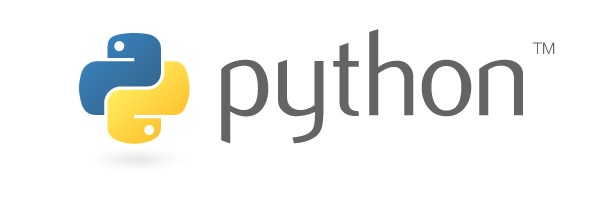

Dayana romero

### 1 Pandas
* Librería (de facto estándar) para estructurar datos tabulares
* Multivariable (string, int, float, bool…)
* Dos clases:
– Series (1 dimensión)
– DataFrames (2+ dimensiones)

In [3]:
# librería externa
import pandas as pd
from pandas import Series, DataFrame

In [4]:
pd.__version__

'2.3.3'

### 2 Series
* Datos unidimensionales (similar a NumPy)
* Elementos + índices modificables

In [6]:
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'])
print(countries)


0        Spain
1      Andorra
2    Gibraltar
3     Portugal
4       France
dtype: object


In [7]:
# especificando el índice
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'],
index=range(10,60,10))
print(countries)

10        Spain
20      Andorra
30    Gibraltar
40     Portugal
50       France
dtype: object


In [8]:
# los índices pueden ser de más tipos
football_cities = pd.Series(['Barcelona','Madrid','Valencia','Sevilla'],
index=['a','b','c','d'])
print(football_cities)

a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
dtype: object


In [9]:
# Atributos
football_cities.name = 'Ciudades con dos equipos en primera' # nombrar la Serie
football_cities.index.name = 'Id' # Describir los índices
print(football_cities)

Id
a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [11]:
 # acceso similar a NumPy o listas, según posición (depecrated)
print(football_cities[2])
# acceso a través del índice semántico
print(football_cities['c'])
print(football_cities['c'] == football_cities[2])

Valencia
Valencia
True


C:\Users\HP\AppData\Local\Temp\ipykernel_18944\426527681.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(football_cities[2])
C:\Users\HP\AppData\Local\Temp\ipykernel_18944\426527681.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(football_cities['c'] == football_cities[2])


### 3 Tratamiento similar a ndarray

In [13]:
# múltiple recolección de elementos
print(football_cities[ ['a','c'] ])
print(football_cities[ [0, 3] ])

Id
a    Barcelona
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
Id
a    Barcelona
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_18944\3494609972.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(football_cities[ [0, 3] ])


In [14]:
# slicing
print(football_cities[:'c']) # incluye ambos extremos con el indice semantico
print(football_cities[:2])

Id
a    Barcelona
b       Madrid
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
Id
a    Barcelona
b       Madrid
Name: Ciudades con dos equipos en primera, dtype: object


In [15]:
#cast a list
lista = list(football_cities[:'c'])
print(lista)
print(type(lista))

['Barcelona', 'Madrid', 'Valencia']
<class 'list'>


In [16]:
type(football_cities[:'c'])

pandas.core.series.Series

In [17]:
#cast a ndarray
import numpy as np
cities = np.array(football_cities[:'c'])
print(cities)
print(type(cities))

['Barcelona' 'Madrid' 'Valencia']
<class 'numpy.ndarray'>


In [18]:
# cas a dictionary
lista = dict(football_cities[:'c'])
print(lista)

{'a': 'Barcelona', 'b': 'Madrid', 'c': 'Valencia'}


In [19]:
# uso de masks para seleccionar
fibonacci = pd.Series([0, 1, 1, 2, 3, 5, 8, 13, 21])
print(fibonacci)
mask = fibonacci > 10
print(mask)
print(fibonacci[mask])
dst = pd.Series([13,21])
print(dst)
dst.equals(fibonacci)
fb = fibonacci[mask]
fb.reset_index(drop=True, inplace=True)
print(fb)
dst.equals(fb)

0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
dtype: int64
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
dtype: bool
7    13
8    21
dtype: int64
0    13
1    21
dtype: int64
0    13
1    21
dtype: int64


True

In [20]:
# aplicar funciones de numpy a la serie
import numpy as np
print(np.sum(fibonacci))

54


In [21]:
#filtrado con np.where
distances = pd.Series([12.1,np.nan,12.8,76.9,6.1,7.2])
valid_distances = np.where(pd.notnull(distances),distances,2)
print(valid_distances)
print(type(valid_distances))

[12.1  2.  12.8 76.9  6.1  7.2]
<class 'numpy.ndarray'>


In [22]:
### 3.0.1 Iteración

In [27]:
# iterar sobre elementos
for value in fibonacci:
    print('Value: ' + str(value))  # <--- Agregamos espacio aquí

# iterar sobre índices
for index in fibonacci.index:
    print('Index: ' + str(index))  # <--- Agregamos espacio aquí

Value: 0
Value: 1
Value: 1
Value: 2
Value: 3
Value: 5
Value: 8
Value: 13
Value: 21
Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8


In [28]:
# iterar sobre elementos e índices al mismo tiempo
for index, value in fibonacci.items():
    print('Index: ' + str(index) + ' Value: ' + str(value))

Index: 0 Value: 0
Index: 1 Value: 1
Index: 2 Value: 1
Index: 3 Value: 2
Index: 4 Value: 3
Index: 5 Value: 5
Index: 6 Value: 8
Index: 7 Value: 13
Index: 8 Value: 21


In [29]:
for index, value in zip(fibonacci.index, fibonacci):
    print('Index: ' + str(index) + ' Value: ' + str(value))

Index: 0 Value: 0
Index: 1 Value: 1
Index: 2 Value: 1
Index: 3 Value: 2
Index: 4 Value: 3
Index: 5 Value: 5
Index: 6 Value: 8
Index: 7 Value: 13
Index: 8 Value: 21


### 3.1 Series como diccionarios
* Interpretar el índice como clave
* Acepta operaciones para diccionarios

In [30]:
# crear una serie a partir de un diccionario
serie = pd.Series( { 'Carlos' : 100, 'Marcos': 98} )
print(serie.index)
print(serie.values)
print(serie)
print(type(serie))

Index(['Carlos', 'Marcos'], dtype='object')
[100  98]
Carlos    100
Marcos     98
dtype: int64
<class 'pandas.core.series.Series'>


In [31]:
# añade y elimina elementos a través de índices
serie['Pedro'] = 12
serie['Pedro']=15
del serie['Marcos']
print(serie)

Carlos    100
Pedro      15
dtype: int64


In [33]:
# query una serie
# print(serie['Marcos'])
if 'Marcos' in serie:
    print(serie['Marcos'])  # <--- Agrega un TAB o 4 espacios aquí
print(serie)                # Esta línea puede ir alineada o no, dependiendo de si quieres que se imprima siempre

Carlos    100
Pedro      15
dtype: int64


### 3.2 Operaciones entre series

In [34]:
# suma de valores con el mismo índice (NaN si no aparece en ambas)
serie1 = pd.Series([10,20,30,40], index=range(4) )
serie2 = pd.Series([1,2,3], index=range(3) )
suma = serie1 + serie2
print(suma)

0    11.0
1    22.0
2    33.0
3     NaN
dtype: float64


In [35]:
# resta de series (similar a la suma)
print(serie1 - serie2)

0     9.0
1    18.0
2    27.0
3     NaN
dtype: float64


In [36]:
# operaciones de pre-filtrado
result = serie1 + serie2
result[pd.isnull(result)] = 0 # mask con isnull()
print(result)

0    11.0
1    22.0
2    33.0
3     0.0
dtype: float64


### 3.2.1 Diferencias entre Pandas Series y diccionario
* Diccionario, es una estructura que relaciona las claves y los valores de forma arbitraria.
* Series, estructura de forma estricta listas de valores con listas de índice asignado en la posición.
* Series, es más eficiente para ciertas operaciones que los dicionarios.
* En las Series los valores de entrada pueden ser listas o Numpy arrays.
* En Series los índices semánticos pueden ser integers o caracteres, en los valores igual.
* Series se podría entender entre una lista y un diccionario Python, pero es de una dimensión.
###  DataFrame
* Datos tabulares (filas x columnas)
* Columnas: Series con índices compartidos

In [37]:
# crear un DataFrame a partir de un diccionario de elementos de la misma␣longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"],
"Edad" : [34,29,12] }
print(diccionario)
# las claves identifican columnas
frame = pd.DataFrame(diccionario)
display(frame)

{'Nombre': ['Marisa', 'Laura', 'Manuel'], 'Edad': [34, 29, 12]}


,Nombre,Edad
0,Marisa,34
1,Laura,29
2,Manuel,12


In [38]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"],
"Edad" : [34,29,12] }
# las claves identifican columnas
frame = pd.DataFrame(diccionario, index = ['a', 'b', 'c'])
display(frame)

,Nombre,Edad
a,Marisa,34
b,Laura,29
c,Manuel,12


In [39]:
# además de 'index', el parámetro 'columns' especifica el número y orden de las␣columnas
frame = pd.DataFrame(diccionario, columns = ['Nacionalidad', 'Nombre', 'Edad','Profesion','Genero'])
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Genero
0,NaN,Marisa,34,NaN,NaN
1,NaN,Laura,29,NaN,NaN
2,NaN,Manuel,12,NaN,NaN


In [40]:
# acceso a columnas
nombres = frame['Nombre']
display(nombres)

0    Marisa
1     Laura
2    Manuel
Name: Nombre, dtype: object

In [41]:
print(type(nombres))
edades = frame['Edad']
display(edades)
print(type(edades))

<class 'pandas.core.series.Series'>


0    34
1    29
2    12
Name: Edad, dtype: int64

<class 'pandas.core.series.Series'>


In [42]:
#siempre que el nombre de la columna lo permita (espacios, ...)
nombres = frame.Profesion
display(nombres)
type(nombres)

0    NaN
1    NaN
2    NaN
Name: Profesion, dtype: object

pandas.core.series.Series

In [43]:
# acceso al primer nombre del DataFrame frame??
print(frame['Nombre'][0])
print(frame.Nombre[0])
print(nombres[0])

Marisa
Marisa
nan


### 4.0.1 Formas de crear un DataFrame
* Con una Serie de pandas
* Lista de diccionarios
* Dicionario de Series de Pandas
* Con un array de Numpy de dos dimensiones
* Con array estructurado de Numpy
### 4.1 Modificar DataFrames

In [44]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"],
"Edad" : [34,29,12] }
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre','Edad','Profesion', 'Direccion'])
frame['Direccion'] = 'Desconocida'
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,Desconocida
1,NaN,Laura,29,NaN,Desconocida
2,NaN,Manuel,12,NaN,Desconocida


In [45]:
lista_direcciones = ['Rue 13 del Percebe, 13', 'Evergreen Terrace, 3', 'Av de los Rombos, 12']

In [48]:
frame['Direccion'] = lista_direcciones
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,"Rue 13 del Percebe, 13"
1,NaN,Laura,29,NaN,"Evergreen Terrace, 3"
2,NaN,Manuel,12,NaN,"Av de los Rombos, 12"


In [49]:
# añadir fila (requiere todos los valores)
user_2 = ['Alemania','Klaus',20, 'none','Desconocida']
frame.loc[3] = user_2
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,"Rue 13 del Percebe, 13"
1,NaN,Laura,29,NaN,"Evergreen Terrace, 3"
2,NaN,Manuel,12,NaN,"Av de los Rombos, 12"
3,Alemania,Klaus,20,none,Desconocida


In [50]:
# eliminar fila (similar a Series)
frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad','Profesion'])
frame = frame.drop(2) # por qué necesitamos reasignar el frame?
display(frame)
frame.drop('Nombre', axis = 1, inplace = True)
display(frame)

,Nacionalidad,Nombre,Edad,Profesion
0,NaN,Marisa,34,NaN
1,NaN,Laura,29,NaN


,Nacionalidad,Edad,Profesion
0,NaN,34,NaN
1,NaN,29,NaN


In [51]:
#eliminar columna
del frame['Profesion']
display(frame)

,Nacionalidad,Edad
0,NaN,34
1,NaN,29


In [52]:
# acceder a la traspuesta (como una matriz)
display(frame.T)

,0,1
Nacionalidad,NaN,NaN
Edad,34,29


### 4.2 Iteración

In [54]:
# iteración sobre el DataFrame?
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Edad','Profesion'])
display(frame)
for a in frame:
 print(a) # qué es 'a'?
print(type(a))

,Nacionalidad,Nombre,Edad,Profesion
0,NaN,Marisa,34,NaN
1,NaN,Laura,29,NaN
2,NaN,Manuel,12,NaN


Nacionalidad
Nombre
Edad
Profesion
<class 'str'>


In [56]:
# iteracion sobre filas
for value in frame.values:
 print(value)
print(type(value))

[nan 'Marisa' 34 nan]
[nan 'Laura' 29 nan]
[nan 'Manuel' 12 nan]
<class 'numpy.ndarray'>


In [57]:
# iterar sobre filas y luego sobre cada valor?
for values in frame.values:
 for value in values:
   print(value)

nan
Marisa
34
nan
nan
Laura
29
nan
nan
Manuel
12
nan


### 4.3 Indexación y slicing con DataFrames

In [59]:
d1 = {'ciudad':'Valencia', 'temperatura':10, 'o2':1}
d2 = {'ciudad':'Barcelona', 'temperatura':8}
d3 = {'ciudad':'Valencia', 'temperatura':9}
d4 = {'ciudad':'Madrid', 'temperatura':10, 'humedad':80}
d5 = {'ciudad':'Sevilla', 'temperatura':15, 'humedad':50, 'co2':6}
d6 = {'ciudad':'Valencia', 'temperatura':10, 'humedad':90, 'co2':10}
ls_data = [d1, d2, d3, d4, d5, d6] # lista de diccionarios
df_data = pd.DataFrame(ls_data, index = list('abcdef'))
display(df_data)

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [60]:
# Acceso a un valor concreto por indice posicional [row, col]
print(df_data.iloc[1,1])
# Acceso a todos los valores hasta un índice por enteros
display(df_data.iloc[:3,:4])
# Acceso a datos de manera explícita, indice semantico (se incluyen)
display(df_data.loc['a', 'temperatura'])
display(df_data.loc[:'c', :'o2'])
display(df_data.loc[:'c', 'temperatura':'o2'])
display(df_data.loc[:, ['ciudad','o2']])

8


,ciudad,temperatura,o2,humedad
a,Valencia,10,1.0,NaN
b,Barcelona,8,NaN,NaN
c,Valencia,9,NaN,NaN


np.int64(10)

,ciudad,temperatura,o2
a,Valencia,10,1.0
b,Barcelona,8,NaN
c,Valencia,9,NaN


,temperatura,o2
a,10,1.0
b,8,NaN
c,9,NaN


,ciudad,o2
a,Valencia,1.0
b,Barcelona,NaN
c,Valencia,NaN
d,Madrid,NaN
e,Sevilla,NaN
f,Valencia,NaN


In [61]:
# indexación con nombre de columna (por columnas)
print(df_data['ciudad']) # --> Series
display(df_data[['ciudad', 'o2']])

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object


,ciudad,o2
a,Valencia,1.0
b,Barcelona,NaN
c,Valencia,NaN
d,Madrid,NaN
e,Sevilla,NaN
f,Valencia,NaN


In [63]:
# Acceso por posición (índice posicional)
df_data.iloc[0]

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object

In [64]:
# indexar semántico con 'loc'
df_data.loc['a'] # --> Series de la fila con índice 'a'

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object

In [65]:
# indexar semántico con 'loc'
df_data.loc[:'b'] # --> DataFrame de la fila con índice 'a' y 'b'

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN


In [66]:
df_data.loc[:'b'].loc[:,["o2", "humedad"]] # slicing anidado

,o2,humedad
a,1.0,NaN
b,NaN,NaN


In [69]:
# si se modifica una porcion del dataframe se modifica el dataframe original(referencia)
display(df_data)
serie = df_data.loc['a']
print(serie)
serie.iloc[2] = 3000 # setting with copy warning!!!
display(df_data)
# copiar data frame
df_2 = df_data.loc['a'].copy()
df_2.iloc[2] = 3000
display(df_2)
display(df_data)

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_18944\2647750659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie.iloc[2] = 3000 # setting with copy warning!!!


,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


ciudad         Valencia
temperatura          10
o2                 3000
humedad             NaN
co2                 NaN
Name: a, dtype: object

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [70]:
# ambos aceptan 'axis' como argumento
# df_data.iloc(axis=1)[0] # --> todos los valores asignados a la primera columna 'ciudad'
df_data.loc(axis=1)['ciudad'] # --> equivalente frame['ciudad']

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object

In [71]:
# qué problema puede tener este fragmento?
frame = pd.DataFrame({"Name" : ['Carlos','Pedro'], "Age" : [34,22]},index=[1,0])
display(frame)

,Name,Age
1,Carlos,34
0,Pedro,22


In [72]:
# por defecto, pandas interpreta índice posicional --> error en frames
# cuando hay posible ambigüedad, utilizar loc y iloc
print('Primera fila\n')
print(frame.iloc[0])
print('\nElemento con index 0\n')
print(frame.loc[0])

Primera fila

Name    Carlos
Age         34
Name: 1, dtype: object

Elemento con index 0

Name    Pedro
Age        22
Name: 0, dtype: object


### 4.4 Objeto Index de Pandas

In [73]:
# Contrucción de índices
ind = pd.Index([2, 3, 5, 23, 26])
# recuperar datos
print(ind[3])
print(ind[::2])

23
Index([2, 5, 26], dtype='int64')


In [74]:
# usar un objeto index al crear dataframe
frame = pd.DataFrame({"Name" : ['Carlos','Pedro', 'Manolo', 'Luis', 'Alberto'],"Age" : [34,22,15,55,23]}, index=ind)
display(frame)

,Name,Age
2,Carlos,34
3,Pedro,22
5,Manolo,15
23,Luis,55
26,Alberto,23


In [77]:
# Ejemplo corregido
if 'Marcos' in serie:
    print(serie['Marcos']) # <--- Este espacio es obligatorio

In [78]:
# change index column
frame = pd.DataFrame({"Name" : ['Carlos','Pedro', 'Manolo', 'Luis', 'Alberto'],"Age" : [34,22,15,55,23]}, index=ind)
display(frame)
frame.set_index('Age', inplace=True)
display(frame)

,Name,Age
2,Carlos,34
3,Pedro,22
5,Manolo,15
23,Luis,55
26,Alberto,23


,Name
Age,
34,Carlos
22,Pedro
15,Manolo
55,Luis
23,Alberto


### 4.5 Slicing

In [79]:
# slice por filas
d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 'Strength' :[10,12,19], 'Wisdom' : [20,13,6]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
display(character_data)
display(character_data[:-1])
display(character_data[1:2])

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13


,Name,Strength,Wisdom
b,theorin,12,13


In [80]:
# slicing para columnas
display(character_data[['Name','Wisdom']])

,Name,Wisdom
a,bundenth,20
b,theorin,13
c,barlok,6


In [81]:
#slicing con 'loc' e 'iloc'
display(character_data.iloc[1:])
display(character_data.loc[:'b','Name':'Strength'])

,Name,Strength,Wisdom
b,theorin,12,13
c,barlok,19,6


,Name,Strength
a,bundenth,10
b,theorin,12


¿Cómo filtrar filas y columnas? Por ejemplo, para todos los personajes, obtener ‘Name’ y ‘Strength

In [82]:
# usando 'loc' para hacer slicing
display(character_data.loc[:,'Name':'Strength'])

,Name,Strength
a,bundenth,10
b,theorin,12
c,barlok,19


In [83]:
# usando 'loc' para buscar específicamente filas y columnas
display(character_data.loc[ ['a','c'], ['Name','Wisdom'] ])

,Name,Wisdom
a,bundenth,20
c,barlok,6


In [84]:
# lo mismo con 'iloc'?
display(character_data.iloc[[0,2],[0,2]])
display(character_data.iloc[[0,-1],[0,-1]])

,Name,Wisdom
a,bundenth,20
c,barlok,6


,Name,Wisdom
a,bundenth,20
c,barlok,6


In [85]:
# lista de los personajes con el atributo Strength > 11
display(character_data.loc[character_data['Strength'] > 11, ['Name','Strength']])

,Name,Strength
b,theorin,12
c,barlok,19


In [86]:
# listar los personajes con Strength > 15 o Wisdom > 15
display(character_data.loc[(character_data['Strength'] > 15) |(character_data['Wisdom'] > 15)])

,Name,Strength,Wisdom
a,bundenth,10,20
c,barlok,19,6


### 5 Cargar y guardar datos en pandas

In [87]:
# Guardar a csv
import os
ruta = os.path.join("res" ,"o_d_d_characters.csv")
#character_data.to_csv(ruta, sep=';') # sep por defecto: ','

In [89]:
ruta = os.path.join("res","titanic.csv")

### otros argumentos to_csv()
* na_rep=‘string’ –> representar valores NaN en el archivo csv
otros argumentos read_csv()
* na_values=‘string’
*  Pandas también ofrece funciones para leer/guardar a otros formatos estándares: JSON, HDF5 o
Excel en su API
### 6 Ejemplo práctico en pandas
* MovieLens dataset
* Reviews de películas
* 1 millón de entradas
* Datos demográficos de usuarios

In [92]:
import numpy as np
import pandas as pd
import zipfile # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os
# descargar MovieLens dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'
ruta = os.path.join("res", "ml-1m.zip")
urllib.request.urlretrieve(url, ruta)

('res\\ml-1m.zip', <http.client.HTTPMessage at 0x25e273b6650>)

In [94]:
# descomprimiendo archivo zip
ruta_ext = os.path.join("res")

with zipfile.ZipFile(ruta, 'r') as z:
    print('Extracting all files...') # <--- Agregar sangría aquí
    z.extractall(ruta_ext)           # <--- Agregar sangría aquí
    print('Done!')                   # <--- Agregar sangría aquí

# take a look at readme y revisar formatos

Extracting all files...
Done!


In [95]:
ruta_users = os.path.join("res", "ml-1m", "users.dat")
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0, engine='python')
display(users_dataset)

,F,1.1,10,48067
1,,,,
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [96]:
# Varios problemas
# sin cabecera! primer valor se ha perdido
# las columnas no tienen nombres
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [97]:
# especificar nombres, cargar sin cabecera
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
header=None, names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
display(users_dataset)

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [98]:
# samplear la tabla
display(users_dataset.sample(10))

,Gender,Age,Occupation,Zip-code
UserID,,,,
5884,M,18,4,20057
2328,M,56,7,13212
1486,M,25,16,90638
3377,M,25,17,03570
540,M,18,1,15213
4691,F,45,17,55419
3750,F,18,4,94116
5099,M,18,0,02780
1835,M,25,19,11501


In [99]:
# samplear la cabeza
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460


In [100]:
# samplear la cola
display(users_dataset.tail(10))

,Gender,Age,Occupation,Zip-code
UserID,,,,
6031,F,18,0,45123
6032,M,45,7,55108
6033,M,50,13,78232
6034,M,25,14,94117
6035,F,25,1,78734
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060


In [101]:
# tipos de datos sobre las columnas
users_dataset.dtypes

Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [102]:
display(users_dataset[users_dataset['Zip-code'].str.len() > 5])

,Gender,Age,Occupation,Zip-code
UserID,,,,
161,M,45,16,98107-2117
233,F,45,20,37919-4204
293,M,56,1,55337-4056
458,M,50,16,55405-2546
506,M,25,16,55103-1006
...,...,...,...,...
5682,M,18,0,23455-4959
5904,F,45,12,954025
5925,F,25,0,90035-4444


In [103]:
# información general sobre atributos numéricos
display(users_dataset.describe())

,Age,Occupation
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [104]:
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      6040 non-null   object
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [105]:
# incluir otros atributos (no todo tiene sentido)
display(users_dataset.describe(include='all'))

,Gender,Age,Occupation,Zip-code
count,6040,6040.000000,6040.000000,6040
unique,2,NaN,NaN,3439
top,M,NaN,NaN,48104
freq,4331,NaN,NaN,19
mean,NaN,30.639238,8.146854,NaN
std,NaN,12.895962,6.329511,NaN
min,NaN,1.000000,0.000000,NaN
25%,NaN,25.000000,3.000000,NaN
50%,NaN,25.000000,7.000000,NaN
75%,NaN,35.000000,14.000000,NaN


In [106]:
# cuántos usuarios son mujeres (Gender='F')
len(users_dataset[users_dataset['Gender'] == 'F'])
#select count(*) from users_dataset where users_dataset.Gender = 'F'

1709

In [107]:
# mostrar solo los menores de edad
under_age = users_dataset[users_dataset['Age'] == 1]
print(len(under_age))
display(under_age.sample(10))

222


,Gender,Age,Occupation,Zip-code
UserID,,,,
3316,M,1,19,92557
743,F,1,2,60660
2199,M,1,10,60613
3843,F,1,10,32043
4807,M,1,2,04101
5074,M,1,0,20132
1434,F,1,10,495321
5247,F,1,10,01915
5953,M,1,10,21030


In [109]:
# Agregamos .copy() al final
under_age = users_dataset[users_dataset['Age'] == 1].copy()

# Ahora puedes modificarlo sin advertencias
under_age['Age'] = np.nan

In [110]:
# Modifica directamente el original donde la condición se cumpla
users_dataset.loc[users_dataset['Age'] == 1, 'Age'] = np.nan

In [112]:
# filtrar edad incorrecta (mínimo 18) Fixing it by Copying the slice
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    engine='python')

under_age = users_dataset[users_dataset['Age'] == 1]
under_age_copy = under_age.copy()

display(under_age_copy.head())
under_age_copy['Age'] = np.nan
display(under_age_copy.head())

# Para actualizar el original sin errores:
users_dataset.loc[users_dataset['Age'] == 1, 'Age'] = np.nan
display(users_dataset.head())

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748
86,F,1,10,54467


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748
86,F,NaN,10,54467


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [114]:
# filtrar edad incorrecta (míninimo 18) Remove them from the dataset
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
header=None, names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
display(users_dataset[users_dataset['Age'] == 1].head(4))
users_dataset.loc[users_dataset['Age'] == 1, 'Age'] = np.nan
display(users_dataset)
display(users_dataset.loc[pd.isnull(users_dataset['Age'])].head(4))
users_dataset.drop(users_dataset[pd.isnull(users_dataset['Age'])].index,inplace = True)
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455
...,...,...,...,...
6036,F,25.0,15,32603
6037,F,45.0,1,76006
6038,F,56.0,1,14706


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [115]:
# Agrupar datos por atributos
display(users_dataset.groupby(by='Gender').describe())

Age                                                     Occupation  \
         count       mean        std   min   25%   50%   75%   max      count   
Gender                                                                          
F       1631.0  32.287554  11.792015  18.0  25.0  25.0  45.0  56.0     1631.0   
M       4187.0  31.568665  11.716053  18.0  25.0  25.0  35.0  56.0     4187.0   

                                                       
            mean       std  min  25%  50%   75%   max  
Gender                                                 
F       6.498467  5.960285  0.0  1.0  4.0  11.0  20.0  
M       8.743253  6.441753  0.0  4.0  7.0  15.0  20.0

In [116]:
# Grabar la tabla modificada
# Cambiar el separador a ','
# Guardar NaN como 'null'
ruta_output = os.path.join('res', 'ml-1m', 'o_users_processed.csv')
users_dataset.to_csv(ruta_output, sep=',',na_rep='null')

### 7 Ejercicios
* Hacer un análisis general de los otros dos archivos CSV en ml-1m (‘movies.dat’ y ‘ratings.dat’)
* Analizando el dataset ratings.dat, ¿hay algún usuario que no tenga ninguna review? ¿Cuántos
tienen menos de 30 reviews?

In [122]:
# 1. Análisis de Movies
print("--- Análisis de Movies ---")
print(f"Total de películas: {len(movies)}")
print("Géneros únicos (primeros 5):", movies['Genres'].head())
display(movies.describe(include='all'))

# 2. Análisis de Ratings
print("\n--- Análisis de Ratings ---")
print(f"Total de reviews: {len(ratings)}")
print(f"Calificación promedio: {ratings['Rating'].mean():.2f}")
print(f"Rango de fechas (Timestamp): {ratings['Timestamp'].min()} a {ratings['Timestamp'].max()}")

--- Análisis de Movies ---
Total de películas: 3883
Géneros únicos (primeros 5): MovieID
1     Animation|Children's|Comedy
2    Adventure|Children's|Fantasy
3                  Comedy|Romance
4                    Comedy|Drama
5                          Comedy
Name: Genres, dtype: object


,Title,Genres
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843



--- Análisis de Ratings ---
Total de reviews: 1000209
Calificación promedio: 3.58
Rango de fechas (Timestamp): 956703932 a 1046454590


In [123]:
# Obtenemos los IDs de usuarios que han hecho al menos una review
usuarios_con_review = ratings['UserID'].unique()

# Buscamos en el dataset de usuarios quiénes NO están en esa lista
# (Asegúrate de que users_dataset tenga el UserID como índice o columna)
usuarios_sin_review = users_dataset[~users_dataset.index.isin(usuarios_con_review)]

print(f"¿Hay usuarios sin review?: {'Sí' if len(usuarios_sin_review) > 0 else 'No'}")
print(f"Cantidad exacta de usuarios sin review: {len(usuarios_sin_review)}")

¿Hay usuarios sin review?: No
Cantidad exacta de usuarios sin review: 0


In [124]:
# Contamos cuántas reviews tiene cada UserID
conteo_reviews = ratings.groupby('UserID').size()

# Filtramos los que tienen menos de 30
menos_de_30 = conteo_reviews[conteo_reviews < 30]

print(f"Cantidad de usuarios con menos de 30 reviews: {len(menos_de_30)}")

Cantidad de usuarios con menos de 30 reviews: 751
